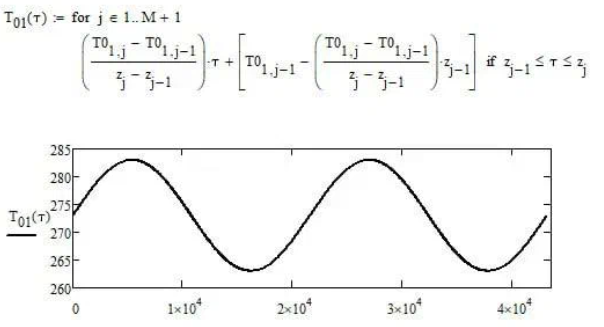

In [3]:
cells_path = 'cl'
background_path = 'bg'

In [4]:
import cv2
import numpy as np
import random
import os
from glob import glob
import matplotlib.pyplot as plt
import math 

def bg_create():
    bg = np.zeros((512,512,3), dtype=np.uint8)
    patch = glob(os.path.join('bg/',"*.png"))
    for i in range(512//32):
        for j in range(512//32):
            p = cv2.imread(random.choice(patch),cv2.IMREAD_GRAYSCALE)
            p = cv2.cvtColor(p, cv2.COLOR_GRAY2BGR)
            bg[i*32:(i+1)*32,j*32:(j+1)*32] = p
    return bg
def cell_create(bg,a,b,c,omega,i,eps_noise):
    return img
def generate():
    while 1:
        img = bg_create()
        for i in range(random.randint(1,10)):
            img = cell_create(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gs = gauss(img)
        ct = const(img)
        yield img, gs, ct

(122, 78)
(154, 82)
(186, 84)
(218, 96)
(250, 118)
(282, 126)
(314, 128)
(346, 155)
(378, 155)
(410, 174)


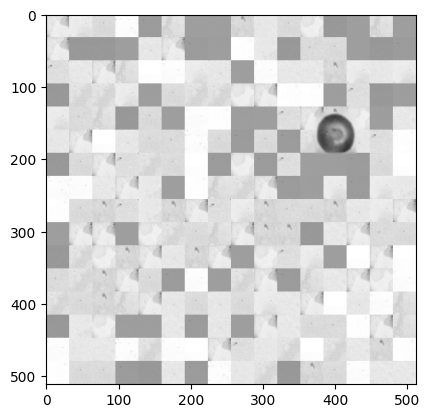

In [5]:
bg = bg_create()
a = random.random()
b = random.random()*10+2
c = random.random()*10+1
omega = random.random()
i = random.randint(70, 300)
cells = glob(os.path.join('cl/',"*.png"))
cell = cv2.imread(cells[0],cv2.IMREAD_GRAYSCALE)
cell = cv2.cvtColor(cell, cv2.COLOR_GRAY2BGR)
mask = 255 * np.ones(cell.shape, dtype=np.uint8)
for j in range(0,10):
    eps_noise = random.randint(20,40)

    if(i > 512 -64):
        i = 64
    place = (i,int(a*i + b + c * math.sin(omega*i) + eps_noise))
    img = cv2.seamlessClone(cell,bg,mask,place,cv2.NORMAL_CLONE)
    cv2.imwrite("frames/" + str(j) + "-0.png", img)

    y0 = place[1]
    x0 = i

    i = i + 32
            
    place = (i,int(a*i + b + c * math.sin(omega*i) + eps_noise))
    img = cv2.seamlessClone(cell,bg,mask,place,cv2.NORMAL_CLONE)
    cv2.imwrite("frames/" + str(j) + "-23.png", img)
    
    y1 = place[1]
    x1 = i
    x= x0 + int(32/22)
    print(place)
    for k in range(1, 23):
        x = int(x + 32/22)
        y1 = ((y1 - y0)/(x1-x0))*x + (y0 - ((y1-y0)/(x1-x0))*x0)
        place = (x,int(y1))
        img = cv2.seamlessClone(cell,bg,mask,place,cv2.NORMAL_CLONE)
        cv2.imwrite("frames/" + str(j) + "-" + str(k) + ".png", img)
    plt.imshow(img, cmap = 'gray')

In [6]:
# Этап 2. Трекинг объектов.
# Используя пример, приведенный в лекции про трекинг, решить задачу трекинга объектов
# Пути (положения) объктов на каждом кадре сохранить в файл.
# Визуализировать траектории объектов на изображении.

In [7]:
#Создание видео из последовательности кадров

In [8]:
import cv2
import numpy as np
import glob

img_array = []
for i in range(0,10):
    img = cv2.imread("frames/" + str(i) + "-0.png")
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
    for k in range (1,23):
       img = cv2.imread("frames/" + str(i) + "-" + str(k) + ".png")
       height, width, layers = img.shape
       size = (width,height)
       img_array.append(img)
    img = cv2.imread("frames/" + str(i) + "-23.png")
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
print(len(img_array))

240


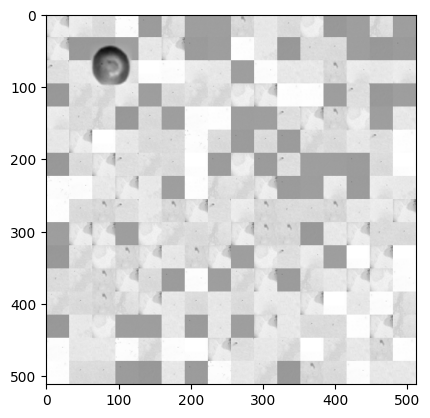

In [9]:
out = cv2.VideoWriter('video.avi',cv2.VideoWriter_fourcc(*'DIVX'), 24, size)

for i in img_array:
   out.write(i)
out.release()
plt.imshow(img_array[0])

In [82]:
import cv2
import os
cap = cv2.VideoCapture('video.avi')
backsub = cv2.createBackgroundSubtractorMOG2()
trak = []
pos = []
assert cap.isOpened(), "file/camera could not be opened!"
while True:
   (success, frame) = cap.read() # cap.read() always returns a tuple of two things
   if not success:
       break # you absolutely must check this
   
   fg_mask = backsub.apply(frame)
   retval, mask_thresh = cv2.threshold( fg_mask, 180, 255, cv2.THRESH_BINARY)
   kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 1))
   mask_eroded = cv2.morphologyEx(mask_thresh, cv2.MORPH_OPEN, kernel) 
   
   contours, hierarchy = cv2.findContours(mask_eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
   min_contour_area = 300
   large_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area] 
   frame_out = frame.copy()
   for cnt in large_contours:
                x, y, w, h = cv2.boundingRect(cnt)
                frame_out = cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 200), 3)
                pos.append((x + int(w/2),y + int(h/2)))   
                trak.append(frame_out) 
                height, width, layers = frame_out.shape
                size = (width,height)
   for i in range(1, len(pos)):
                cv2.line(frame_out, pos[i - 1], pos[i], (255,0,0), 2)
print(len(trak))
with open('traks.csv','w') as f:
    for (x,y) in pos:
        f.write(f"{x},{y}\n")
out = cv2.VideoWriter('trak.avi',cv2.VideoWriter_fourcc(*'DIVX'), 24, size)

for i in trak:
   out.write(i)
out.release()

209
